In [1]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)

DATASET = "pastis"
FINAL_DATA_NAME = 'pastis-full-fourier' # + channel
CONSTANT_SAMPLE_SIZE = int(1e5)
RAW_DATA_SUFFIX = "pastis-RGB"
SAVE_DF = False

data_dir = os.path.join(ROOT_DIR, 'raw-data','pastis')
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]
file_names = os.listdir(data_dir)
data_dir
BATCH_NUM = None

In [2]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))
freq_df = pd.read_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"), index_col= ["dataset", "transform", "group"])


In [3]:
file_list = [os.path.join(data_dir, f"full-{RAW_DATA_SUFFIX}", filename) for filename in os.listdir(data_dir)]
file_names = os.listdir(os.path.join(data_dir, f"full-{RAW_DATA_SUFFIX}"))
file_names[:5]

['test0.npz', 'test1.npz', 'test10.npz', 'test100.npz', 'test1000.npz']

In [4]:
'''Assuming No batching is required. Not applicable for agriVision'''

# data_dir = os.path.join(ROOT_DIR, "raw-data", "agriVision", "full-agriVision-RGB-cleaned")

# for channel in ['red', 'blue', 'green', 'gray', 'infrared']:

#     channel_fr = convert_to_fourier_basis(data_dir, channel, debug = True)
#     pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"full-agriVision-fourier-{channel}-df.pickle"))

#     min_group, max_group = 2, max(channel_fr['band'])
#     group_data_map = dict()
#     group_data_map_size = dict()
#     for group in np.arange(min_group, max_group + 1):
#         data = channel_fr[(channel_fr['band'] == group)]['data'].iloc[0]
#         group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
#         group_data_map_size[group] = data.size
    
#     pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
#     pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
    

'Assuming No batching is required. Not applicable for agriVision'

In [5]:
'''To split large dataset into many batches, only needs to be run once'''
# k = 10000
# target_dir = os.path.join(ROOT_DIR, 'raw-data', 'agriVision') # Where the batch{i} folders will be created
# directorySplit(folder_dir = data_dir, target_dir = target_dir, name = RAW_DATA_SUFFIX, k = k)
# print(f"{len(file_names)//k} batches created" )

'To split large dataset into many batches, only needs to be run once'

In [6]:
'''Show all subsets of data in raw data folder that have already been created'''
print(''.join([x+"\n" for x in os.listdir(data_dir) if x.__contains__(RAW_DATA_SUFFIX)]))


full-pastis-RGB



# Fourier

In [18]:
#Values obtained from plots in pastisFourierEDA.ipynb
STARTING_VALUE = 0.059498227389561786
ENDING_VALUE = 0.6743233008450027
MULT_FACTOR = 1.08
if BATCH_NUM is None:
    batch_dir = os.path.join(ROOT_DIR, "raw-data", "pastis", f"full-{RAW_DATA_SUFFIX}")
else:
    batch_dir = os.path.join(ROOT_DIR, "raw-data", "pastis", f"batch{BATCH_NUM}-{RAW_DATA_SUFFIX}")
splits = getSplits(STARTING_VALUE,ENDING_VALUE, MULT_FACTOR)

In [19]:
TRANSFORM = "fourier"
channel = "red"

channel_fr = convert_to_fourier_basis(batch_dir, channel, split_list = splits, debug = True, image_opener = npz_opener)
channel_fr['data'] = channel_fr['data'].apply(lambda x : x.astype(np.float32))
if SAVE_DF:
    if BATCH_NUM is None:
        pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/{FINAL_DATA_NAME}-{channel}-df.pickle"))
    else:
        pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-df.pickle"))

min_group, max_group = 2, max(channel_fr['band'])
group_data_map = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = channel_fr[(channel_fr['band'] == group)]['data'].iloc[0]
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_size[group] = data.size
    freq_df.loc[DATASET, TRANSFORM, group] = np.mean(channel_fr[(channel_fr['band'] == group)]['magnitude_endpoints'].iloc[0])
freq_df.to_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"))

if BATCH_NUM is None:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
else:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-size.pickle"))

channel_fr.head()


  1%|          | 19/1590 [00:00<00:17, 88.72it/s]

100%|██████████| 1590/1590 [00:10<00:00, 156.39it/s]


[0.05949823 0.06425809 0.06939873 0.07495063 0.08094668 0.08742242
 0.09441621 0.10196951 0.11012707 0.11893723 0.12845221 0.13872839
 0.14982666 0.16181279 0.17475781 0.18873844 0.20383751 0.22014452
 0.23775608 0.25677656 0.27731869 0.29950418 0.32346452 0.34934168
 0.37728901 0.40747213 0.44006991 0.4752755  0.51329754 0.55436134
 0.59871025 0.64660707 0.69833563]


100%|██████████| 33/33 [00:01<00:00, 22.54it/s]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,red,"(0.0, 0.05687585851000405)",27,"[-24.861084, 30.276884, -56.80937, 131.9214, -..."
1,2,red,"(0.059498227389561786, 0.06298638865858242)",4,"[-6.030884, 1.4241083, -0.52024317, -1.1112274..."
2,3,red,"(0.06442352540027595, 0.06720566614877052)",4,"[-2.9934132, -1.3881443, -0.03483515, -5.82839..."
3,4,red,"(0.06987712429686843, 0.07411588266019639)",6,"[3.6712542, 1.7049004, 2.7085834, -2.007795, 2..."
4,5,red,"(0.07694420157653206, 0.08043461047646094)",6,"[3.2446606, -2.3480656, 0.9849038, -0.30818298..."


In [20]:
del channel_fr, group_data_map, group_data_map_size

In [21]:
TRANSFORM = "fourier"
channel = "blue"

channel_fr = convert_to_fourier_basis(batch_dir, channel, split_list = splits, debug = True, image_opener = npz_opener)
channel_fr['data'] = channel_fr['data'].apply(lambda x : x.astype(np.float32))
if SAVE_DF:
    if BATCH_NUM is None:
        pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/{FINAL_DATA_NAME}-{channel}-df.pickle"))
    else:
        pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-df.pickle"))

min_group, max_group = 2, max(channel_fr['band'])
group_data_map = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = channel_fr[(channel_fr['band'] == group)]['data'].iloc[0]
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_size[group] = data.size
    freq_df.loc[DATASET, TRANSFORM, group] = np.mean(channel_fr[(channel_fr['band'] == group)]['magnitude_endpoints'].iloc[0])
freq_df.to_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"))

if BATCH_NUM is None:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
else:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-size.pickle"))

channel_fr.head()

100%|██████████| 1590/1590 [00:09<00:00, 160.21it/s]


[0.05949823 0.06425809 0.06939873 0.07495063 0.08094668 0.08742242
 0.09441621 0.10196951 0.11012707 0.11893723 0.12845221 0.13872839
 0.14982666 0.16181279 0.17475781 0.18873844 0.20383751 0.22014452
 0.23775608 0.25677656 0.27731869 0.29950418 0.32346452 0.34934168
 0.37728901 0.40747213 0.44006991 0.4752755  0.51329754 0.55436134
 0.59871025 0.64660707 0.69833563]


100%|██████████| 33/33 [00:01<00:00, 26.23it/s]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,blue,"(0.0, 0.05687585851000405)",27,"[-18.225143, 13.255581, -140.12164, 310.49835,..."
1,2,blue,"(0.059498227389561786, 0.06298638865858242)",4,"[-7.0464673, 2.12714, 0.034075595, -0.96772146..."
2,3,blue,"(0.06442352540027595, 0.06720566614877052)",4,"[-3.9977355, -2.1376965, -0.24100864, -6.82660..."
3,4,blue,"(0.06987712429686843, 0.07411588266019639)",6,"[4.5522947, 1.6904095, 3.4049926, -2.2560484, ..."
4,5,blue,"(0.07694420157653206, 0.08043461047646094)",6,"[5.6217756, -3.2498698, 1.6942921, 0.5276802, ..."


In [22]:
del channel_fr, group_data_map, group_data_map_size

In [23]:
TRANSFORM = "fourier"
channel = "green"

channel_fr = convert_to_fourier_basis(batch_dir, channel, split_list = splits, debug = True, image_opener = npz_opener)
channel_fr['data'] = channel_fr['data'].apply(lambda x : x.astype(np.float32))
if SAVE_DF:
    if BATCH_NUM is None:
        pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/{FINAL_DATA_NAME}-{channel}-df.pickle"))
    else:
        pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-df.pickle"))

min_group, max_group = 2, max(channel_fr['band'])
group_data_map = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = channel_fr[(channel_fr['band'] == group)]['data'].iloc[0]
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_size[group] = data.size
    freq_df.loc[DATASET, TRANSFORM, group] = np.mean(channel_fr[(channel_fr['band'] == group)]['magnitude_endpoints'].iloc[0])
freq_df.to_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"))
    
if BATCH_NUM is None:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
else:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-size.pickle"))

channel_fr.head()

100%|██████████| 1590/1590 [00:07<00:00, 201.12it/s]


[0.05949823 0.06425809 0.06939873 0.07495063 0.08094668 0.08742242
 0.09441621 0.10196951 0.11012707 0.11893723 0.12845221 0.13872839
 0.14982666 0.16181279 0.17475781 0.18873844 0.20383751 0.22014452
 0.23775608 0.25677656 0.27731869 0.29950418 0.32346452 0.34934168
 0.37728901 0.40747213 0.44006991 0.4752755  0.51329754 0.55436134
 0.59871025 0.64660707 0.69833563]


100%|██████████| 33/33 [00:01<00:00, 23.83it/s]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,green,"(0.0, 0.05687585851000405)",27,"[9.734376, 101.640686, -63.905636, 208.2195, -..."
1,2,green,"(0.059498227389561786, 0.06298638865858242)",4,"[-6.2086134, 2.059569, -1.7726663, -1.6128868,..."
2,3,green,"(0.06442352540027595, 0.06720566614877052)",4,"[-3.2425828, -2.7061038, 0.4256218, -5.6334505..."
3,4,green,"(0.06987712429686843, 0.07411588266019639)",6,"[3.7014298, 1.8141629, 2.4538603, -2.1576967, ..."
4,5,green,"(0.07694420157653206, 0.08043461047646094)",6,"[4.112957, -2.101753, 1.1816337, -0.14651218, ..."


In [24]:
del channel_fr, group_data_map, group_data_map_size

In [25]:
TRANSFORM = "fourier"
channel = "gray"

channel_fr = convert_to_fourier_basis(batch_dir, channel, split_list = splits, debug = True, image_opener = npz_opener)
channel_fr['data'] = channel_fr['data'].apply(lambda x : x.astype(np.float32))
if SAVE_DF:
    if BATCH_NUM is None:
        pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/{FINAL_DATA_NAME}-{channel}-df.pickle"))
    else:
        pd.to_pickle(channel_fr, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-df.pickle"))

min_group, max_group = 2, max(channel_fr['band'])
group_data_map = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = channel_fr[(channel_fr['band'] == group)]['data'].iloc[0]
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_size[group] = data.size
    freq_df.loc[DATASET, TRANSFORM, group] = np.mean(channel_fr[(channel_fr['band'] == group)]['magnitude_endpoints'].iloc[0])
freq_df.to_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"))
    
if BATCH_NUM is None:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
else:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-size.pickle"))

channel_fr.head()

100%|██████████| 1590/1590 [00:08<00:00, 180.95it/s]


[0.05949823 0.06425809 0.06939873 0.07495063 0.08094668 0.08742242
 0.09441621 0.10196951 0.11012707 0.11893723 0.12845221 0.13872839
 0.14982666 0.16181279 0.17475781 0.18873844 0.20383751 0.22014452
 0.23775608 0.25677656 0.27731869 0.29950418 0.32346452 0.34934168
 0.37728901 0.40747213 0.44006991 0.4752755  0.51329754 0.55436134
 0.59871025 0.64660707 0.69833563]


100%|██████████| 33/33 [00:01<00:00, 25.03it/s]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,gray,"(0.0, 0.05687585851000405)",27,"[-3.794566, 70.223976, -70.4668, 197.05296, -1..."
1,2,gray,"(0.059498227389561786, 0.06298638865858242)",4,"[-6.2503843, 1.8771269, -1.1921712, -1.3892307..."
2,3,gray,"(0.06442352540027595, 0.06720566614877052)",4,"[-3.253869, -2.2470965, 0.21195279, -5.8271747..."
3,4,gray,"(0.06987712429686843, 0.07411588266019639)",6,"[3.7890387, 1.767215, 2.6381807, -2.1238875, 2..."
4,5,gray,"(0.07694420157653206, 0.08043461047646094)",6,"[4.0250173, -2.306051, 1.181156, -0.11796299, ..."


In [26]:
del channel_fr, group_data_map, group_data_map_size

# Wavelet

In [7]:
FINAL_DATA_NAME = 'pastis-full-wavelet'
if BATCH_NUM is None:
    batch_dir = os.path.join(ROOT_DIR, "raw-data", "pastis", f"full-{RAW_DATA_SUFFIX}")
else:
    batch_dir = os.path.join(ROOT_DIR, "raw-data", "pastis", f"batch{BATCH_NUM}-{RAW_DATA_SUFFIX}")

In [36]:
TRANSFORM = "wavelet"
channel = "red"

channel_wv = convert_to_wavelet_basis(batch_dir, channel, debug = True, image_opener = npz_opener)
channel_wv['data'] = channel_wv['data']#.apply(lambda x : x.astype(np.float32))
if SAVE_DF:
    if BATCH_NUM is None:
        pd.to_pickle(channel_wv, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/{FINAL_DATA_NAME}-{channel}-df.pickle"))
    else:
        pd.to_pickle(channel_wv, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-df.pickle"))

min_group, max_group = 2, max(channel_wv['layer'])
group_data_map = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = np.append(channel_wv[(channel_wv['orientation'] == 'H') & (channel_wv['layer'] == group)]['data'].iloc[0],
                     channel_wv[(channel_wv['orientation'] == 'V') & (channel_wv['layer'] == group)]['data'].iloc[0])
    data += data + np.random.normal(0, 0.1, data.shape)
    
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_size[group] = data.size
    freq_df.loc[DATASET, TRANSFORM, group] = channel_wv[(channel_wv['layer'] == group)]['frequency'].iloc[0]
freq_df.to_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"))
                             
if BATCH_NUM is None:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
else:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-size.pickle"))

channel_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:07<00:00, 214.84it/s]


,channel,layer,frequency,orientation,data
0,red,1,0.124514,L1,"[-24.86108416347049, 30.276884314113154, -56.8..."
1,red,2,0.142301,D,"[-10.654138411261027, -30.49499418651418, -25...."
2,red,2,0.142301,H,"[-5.354850321977363, -14.875904589057019, 10.5..."
3,red,2,0.142301,V,"[-15.147934710973576, 21.883811625915776, -4.0..."
4,red,3,0.166018,D,"[9.681959923608806, -15.804082927119424, -18.5..."


<Axes: ylabel='Count'>

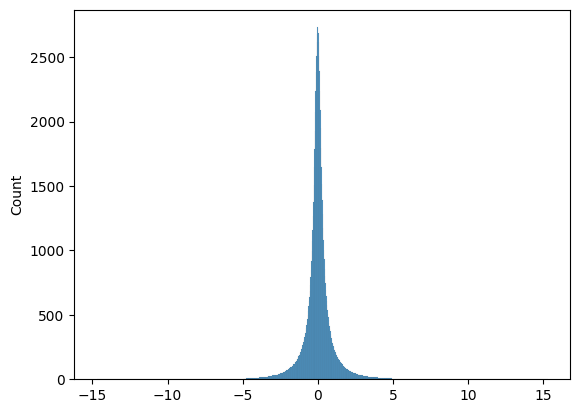

In [48]:
sns.histplot(group_data_map[8])

<Axes: ylabel='Count'>

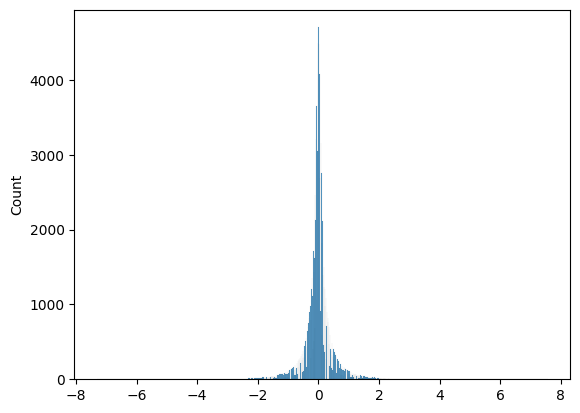

In [43]:
sns.histplot(group_data_map[8])

In [47]:
len(unique_values), group_data_map[8].size


(100000, 100000)

In [46]:
unique_values, counts = np.unique(group_data_map[8], return_counts=True)
sorted_indices = np.argsort(-counts)  # Sort in descending order of counts
sorted_unique_values = unique_values[sorted_indices]
sorted_counts = counts[sorted_indices]

list(zip(sorted_unique_values, sorted_counts))

[(np.float32(15.301439), np.int64(1)),
 (np.float32(10.022576), np.int64(1)),
 (np.float32(9.415312), np.int64(1)),
 (np.float32(9.061678), np.int64(1)),
 (np.float32(8.818174), np.int64(1)),
 (np.float32(8.61014), np.int64(1)),
 (np.float32(8.433446), np.int64(1)),
 (np.float32(8.3192), np.int64(1)),
 (np.float32(8.188912), np.int64(1)),
 (np.float32(8.098002), np.int64(1)),
 (np.float32(8.014498), np.int64(1)),
 (np.float32(7.930105), np.int64(1)),
 (np.float32(7.849276), np.int64(1)),
 (np.float32(7.770158), np.int64(1)),
 (np.float32(7.7129974), np.int64(1)),
 (np.float32(7.648772), np.int64(1)),
 (np.float32(-7.6728654), np.int64(1)),
 (np.float32(-7.7287407), np.int64(1)),
 (np.float32(-7.795574), np.int64(1)),
 (np.float32(-7.858834), np.int64(1)),
 (np.float32(-7.9411087), np.int64(1)),
 (np.float32(-8.021873), np.int64(1)),
 (np.float32(-8.114268), np.int64(1)),
 (np.float32(-8.208306), np.int64(1)),
 (np.float32(-8.315844), np.int64(1)),
 (np.float32(-8.45829), np.int64(1)),


In [29]:
del channel_wv, group_data_map, group_data_map_size

In [33]:
TRANSFORM = "wavelet"
channel = "green"

channel_wv = convert_to_wavelet_basis(batch_dir, channel, debug = True, image_opener = npz_opener)
channel_wv['data'] = channel_wv['data'].apply(lambda x : x.astype(np.float32))
if SAVE_DF:
    if BATCH_NUM is None:
        pd.to_pickle(channel_wv, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/{FINAL_DATA_NAME}-{channel}-df.pickle"))
    else:
        pd.to_pickle(channel_wv, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-df.pickle"))

min_group, max_group = 2, max(channel_wv['layer'])
group_data_map = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = np.append(channel_wv[(channel_wv['orientation'] == 'H') & (channel_wv['layer'] == group)]['data'].iloc[0],
                     channel_wv[(channel_wv['orientation'] == 'V') & (channel_wv['layer'] == group)]['data'].iloc[0])
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_size[group] = data.size
    freq_df.loc[DATASET, TRANSFORM, group] = channel_wv[(channel_wv['layer'] == group)]['frequency'].iloc[0]
freq_df.to_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"))

if BATCH_NUM is None:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
else:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-size.pickle"))

channel_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:05<00:00, 290.94it/s]


,channel,layer,frequency,orientation,data
0,green,1,0.124514,L1,"[9.734376, 101.640686, -63.905636, 208.2195, -..."
1,green,2,0.142301,D,"[-12.837811, -32.375008, -18.437641, -1.172628..."
2,green,2,0.142301,H,"[-0.45449993, -12.5458355, 9.304177, -40.17458..."
3,green,2,0.142301,V,"[-7.351056, 20.16052, -4.0876646, 55.60931, 4...."
4,green,3,0.166018,D,"[10.446884, -19.235142, -21.010305, -4.067507,..."


In [31]:
del channel_wv, group_data_map, group_data_map_size

In [44]:
TRANSFORM = "wavelet"
channel = "blue"

channel_wv = convert_to_wavelet_basis(batch_dir, channel, debug = True, image_opener = npz_opener)
channel_wv['data'] = channel_wv['data'].apply(lambda x : x.astype(np.float32))
if SAVE_DF:
    if BATCH_NUM is None:
        pd.to_pickle(channel_wv, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/{FINAL_DATA_NAME}-{channel}-df.pickle"))
    else:
        pd.to_pickle(channel_wv, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-df.pickle"))

min_group, max_group = 2, max(channel_wv['layer'])
group_data_map = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = np.append(channel_wv[(channel_wv['orientation'] == 'H') & (channel_wv['layer'] == group)]['data'].iloc[0],
                     channel_wv[(channel_wv['orientation'] == 'V') & (channel_wv['layer'] == group)]['data'].iloc[0])
    data += data + np.random.normal(0, 0.1, data.shape)
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_size[group] = data.size
    freq_df.loc[DATASET, TRANSFORM, group] = channel_wv[(channel_wv['layer'] == group)]['frequency'].iloc[0]
freq_df.to_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"))
    
if BATCH_NUM is None:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
else:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-size.pickle"))

channel_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:05<00:00, 280.91it/s]


,channel,layer,frequency,orientation,data
0,blue,1,0.124514,L1,"[-18.225143, 13.255581, -140.12164, 310.49835,..."
1,blue,2,0.142301,D,"[-26.660172, -33.19221, -40.45443, -22.884901,..."
2,blue,2,0.142301,H,"[-4.135897, -10.344801, 22.007734, -39.213066,..."
3,blue,2,0.142301,V,"[-17.700449, 34.604366, -14.735696, 96.65502, ..."
4,blue,3,0.166018,D,"[9.813681, -24.038786, -30.602663, -0.97416747..."


In [33]:
del channel_wv, group_data_map, group_data_map_size

In [24]:
TRANSFORM = "wavelet"
channel = "gray"

channel_wv = convert_to_wavelet_basis(batch_dir, channel, debug = True, image_opener = npz_opener)
channel_wv['data'] = channel_wv['data'].apply(lambda x : x.astype(np.float32))
if SAVE_DF:
    if BATCH_NUM is None:
        pd.to_pickle(channel_wv, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/{FINAL_DATA_NAME}-{channel}-df.pickle"))
    else:
        pd.to_pickle(channel_wv, os.path.join(ROOT_DIR, "transformed-data", f"dataframes/batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-df.pickle"))

min_group, max_group = 2, max(channel_wv['layer'])
group_data_map = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = np.append(channel_wv[(channel_wv['orientation'] == 'H') & (channel_wv['layer'] == group)]['data'].iloc[0],
                     channel_wv[(channel_wv['orientation'] == 'V') & (channel_wv['layer'] == group)]['data'].iloc[0])
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_size[group] = data.size
    freq_df.loc[DATASET, TRANSFORM, group] = channel_wv[(channel_wv['layer'] == group)]['frequency'].iloc[0]
freq_df.to_csv(os.path.join(ROOT_DIR, "transformed-data", f"master-frequency-map.csv"))

if BATCH_NUM is None:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"{FINAL_DATA_NAME}-{channel}-size.pickle"))
else:
    pd.to_pickle(group_data_map, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}.pickle"))
    pd.to_pickle(group_data_map_size, os.path.join(ROOT_DIR, "transformed-data", f"batch{BATCH_NUM}{FINAL_DATA_NAME}-{channel}-size.pickle"))

channel_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:08<00:00, 195.81it/s]


,channel,layer,frequency,orientation,data
0,gray,1,0.124514,L1,"[-3.794566, 70.223976, -70.4668, 197.05296, -1..."
1,gray,2,0.142301,D,"[-13.759577, -31.902996, -22.929602, -8.115226..."
2,gray,2,0.142301,H,"[-2.3388486, -12.990121, 11.128556, -33.4963, ..."
3,gray,2,0.142301,V,"[-10.860639, 22.320194, -5.290816, 58.764515, ..."
4,gray,3,0.166018,D,"[10.145019, -18.755291, -21.363108, -2.5355444..."


In [35]:
del channel_wv, group_data_map, group_data_map_size